# Setup

## Colab setup

Run the following cells in order (by pressing `Shift-Enter` or clicking on the "play" button at the top-left of a cell when mousing over it). When a warning pops up, choose "Run anyway".

In [ ]:
!rm -r sample_data
!git clone https://github.com/SimoneBarbaro/data_science_lab_project.git

In [ ]:
import os
os.chdir("./data_science_lab_project/data")
!wget -O TWOSIDES_medDRA.csv.gz https://polybox.ethz.ch/index.php/s/Uemf21AIiZ7ooNi/download
os.chdir("..")

While waiting for the download above to complete, open the file browser on the left by clicking on the folder icon.

**Upload the results archive `results_2020_12_06.zip` ([Polybox link](https://polybox.ethz.ch/index.php/f/2172234367)) to the `data_science_lab_project` folder** by hovering over the folder and choosing "Upload" from the three-dots menu that appears on the right. `results_2020_12_06.zip` should then be within the `data_science_lab_project` folder next to the `src` and `data` folders, which you can check by expanding the folder contents by clicking on the triangle on the left of the folder name.

Additionally, **upload the paired SPiDER data `matrix_spider_filtered_full.pkl.gz` ([Polybox link](https://polybox.ethz.ch/index.php/f/2172246742)) and `matrix_spider_filtered_full_names.pkl.gz` ([Polybox link](https://polybox.ethz.ch/index.php/f/2172246700)) into the `data` folder** (within `data_science_lab_project`) using the three-dots menu of the `data` folder. Expand the `data` folder and check that `matrix_spider_filtered_full.pkl.gz` and `matrix_spider_filtered_full_names.pkl.gz` as well as `TWOSIDES_medDRA.csv.gz` downloaded automatically above are present in it.

In [ ]:
!unzip results_*.zip

In [ ]:
!pip install -r src/requirements.txt
os.chdir("src")

Running the following cells should now list the runs that can be analyzed: each is a clustering method followed by the number of clusters and other relevant parameters (`norm` refers to normalization of columns prior to clustering, `ave` in agglomerative clustering refers to average linkage).
[Silhouette scores](https://en.wikipedia.org/wiki/Silhouette_(clustering)) are also reported if available. Higher score means the clusters are more coherent.

In [1]:
import os, json, re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
cwd = os.getcwd()
results_directory = "../results"
results_directory = os.path.join(cwd, results_directory)
results_table = []
for f in os.listdir(results_directory):
    path = os.path.join(results_directory, f)
    if os.path.isdir(path):
        info_data = os.path.join(path, "results_info.json")
        if os.path.exists(info_data):
            with open(info_data) as info_f:
                info = json.load(info_f)
            results_table.append({"folder": f,
                                  "dataset": info["dataset"],
                                  "method": re.search("_(.*?)[0-9]", f).group(1),
                                  "clusters": re.search("([0-9]+)", f).group(1),
                                  "normalization": "norm" if re.search("norm", f) else "",
                                  "aggl_ave": "ave" if re.search("ave", f) else "",
                                  "silhouette": info["silhouette_score"]})
        else:
            results_table.append({"folder": f})
results_table = pd.DataFrame(results_table)

def full(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_seq_items', None, 'display.max_colwidth', None):
        display(df)

In [2]:
sorting_column = "silhouette"
increasing = False

full(results_table.sort_values(sorting_column, ascending=increasing))

,folder,dataset,method,clusters,normalization,aggl_ave,silhouette
79,tiger_aggl5avenorm,tiger,aggl,5,norm,ave,0.725031
80,tiger_aggl10avenorm,tiger,aggl,10,norm,ave,0.580067
81,tiger_aggl15avenorm,tiger,aggl,15,norm,ave,0.474381
82,tiger_aggl20avenorm,tiger,aggl,20,norm,ave,0.451067
74,tiger_aggl5ave,tiger,aggl,5,,ave,0.420252
75,tiger_aggl10ave,tiger,aggl,10,,ave,0.366572
83,tiger_aggl30avenorm,tiger,aggl,30,norm,ave,0.352387
69,spider_aggl5avenorm,spider,aggl,5,norm,ave,0.310152
70,spider_aggl10avenorm,spider,aggl,10,norm,ave,0.284281
76,tiger_aggl15ave,tiger,aggl,15,,ave,0.283442


## Choose one of the clustering methods from the "folder" column above

In [3]:
name_analysis = 'spider_aggl5avenorm'

In [4]:
# The following sets up filepath variables for use later in the notebook
result_path = os.path.join(results_directory, name_analysis)
analysis_path = os.path.join(result_path, "analysis")

# Clusters

Show the beginning of the clustering results file to check it was read correctly:

In [5]:
pth = os.path.join(result_path, 'results.csv')
clustering_results = pd.read_csv(pth)
display(clustering_results.head())
print("Number of drug pairs: {}\nNumber of clusters: {} (from {} to {})".format(clustering_results.shape[0], clustering_results["cluster"].drop_duplicates().count(), clustering_results["cluster"].min(), clustering_results["cluster"].max()))

,name1,name2,cluster
0,6-aminocaproic acid,acetaminophen,0
1,6-aminocaproic acid,albuterol,0
2,6-aminocaproic acid,aspirin,0
3,6-aminocaproic acid,bumetanide,0
4,6-aminocaproic acid,cefazolin,0


Number of drug pairs: 51686
Number of clusters: 5 (from 0 to 4)


Query for a specific drug pair provide names of both drugs in cell below:

In [6]:
name1 = 'tamoxifen'
name2 = 'bupropion'
clustering_results[(clustering_results['name1'] == name1) & (clustering_results['name2'] == name2)]

,name1,name2,cluster
27564,tamoxifen,bupropion,0


# Side effects analysis

## Choose a level of side effects

There are five levels to the MedDRA hierarchy, of which four are available here. `System Organ Classes (SOC)` are the highest level terms based on location, etiology, or purpose. `High Level Group Terms (hlgt)` which are the next highest level terms are groups of `High Level Terms (hlt)` grouped together by anatomy, pathology, physiology, etiology and function. Likewise, `High Level Terms (hlt)`s themselves are groups of `Preferred Terms (pt)`, the most specific terms, grouped together by the same criteria.

In the cell below, choose the analysis level of Meddra terms to look at for the analysis.

In [7]:
analysis_level = 'soc'

In [8]:
pth = os.path.join(analysis_path, 'scores_' + analysis_level + '_term.csv')
sideeffect_results = pd.read_csv(pth)
sideeffect_results

,cluster,soc_term,perc,tfidf_score,rank
0,0,Blood and lymphatic system disorders,0.023382,0.097349,15.0
1,0,Cardiac disorders,0.054367,0.226354,10.0
2,0,"Congenital, familial and genetic disorders",0.001605,0.007902,26.0
3,0,Ear and labyrinth disorders,0.006005,0.025000,24.0
4,0,Endocrine disorders,0.013389,0.055743,20.0
...,...,...,...,...,...
123,4,"Respiratory, thoracic and mediastinal disorders",0.064470,0.261538,6.0
124,4,Skin and subcutaneous tissue disorders,0.042391,0.171970,12.0
125,4,Social circumstances,0.001490,0.006046,26.0
126,4,Surgical and medical procedures,0.010984,0.044560,19.0


Show the top `N` side effects per group:

In [9]:
N = 4

full(sideeffect_results.sort_values(["cluster","rank"]).groupby("cluster").head(N).set_index(["cluster", "{}_term".format(analysis_level)]))

perc  \
cluster soc_term                                                         
0       Nervous system disorders                              0.098432   
        Gastrointestinal disorders                            0.075936   
        General disorders and administration site conditions  0.073715   
        Vascular disorders                                    0.071743   
1       Nervous system disorders                              0.099876   
        Gastrointestinal disorders                            0.074587   
        General disorders and administration site conditions  0.072670   
        Vascular disorders                                    0.068084   
2       Nervous system disorders                              0.102202   
        Infections and infestations                           0.074366   
        Investigations                                        0.071874   
        Gastrointestinal disorders                            0.068966   
3       Nervous system disorders                              0.121324   
        Gastrointestinal disorders                            0.110294   
        General disorders and administration site conditions  0.106618   
        Vascular disorders                                    0.084559   
4       Nervous system disorders                              0.110173   
        Investigations                                        0.085003   
        General disorders and administration site conditions  0.082409   
        Gastrointestinal disorders                            0.076337   

                                                              tfidf_score  \
cluster soc_term                                                            
0       Nervous system disorders                                 0.409818   
        Gastrointestinal disorders                               0.316157   
        General disorders and administration site conditions     0.306910   
        Vascular disorders                                       0.298698   
1       Nervous system disorders                                 0.417188   
        Gastrointestinal disorders                               0.311557   
        General disorders and administration site conditions     0.303547   
        Vascular disorders                                       0.284392   
2       Nervous system disorders                                 0.432066   
        Infections and infestations                              0.314389   
        Investigations                                           0.303851   
        Gastrointestinal disorders                               0.291556   
3       Nervous system disorders                                 0.447831   
        Gastrointestinal disorders                               0.407119   
        General disorders and administration site conditions     0.393548   
        Vascular disorders                                       0.312125   
4       Nervous system disorders                                 0.446944   
        Investigations                                           0.344836   
        General disorders and administration site conditions     0.334312   
        Gastrointestinal disorders                               0.309681   

                                                              rank  
cluster soc_term                                                    
0       Nervous system disorders                               1.0  
        Gastrointestinal disorders                             2.0  
        General disorders and administration site conditions   3.0  
        Vascular disorders                                     4.0  
1       Nervous system disorders                               1.0  
        Gastrointestinal disorders                             2.0  
        General disorders and administration site conditions   3.0  
        Vascular disorders                                     4.0  
2       Nervous system disorders                    

## Clusters numbers

Show cluster labels and count them:

In [10]:
sideeffect_results["cluster"].drop_duplicates().values

array([0, 1, 2, 3, 4])

In [11]:
num_clusters = sideeffect_results["cluster"].drop_duplicates().count()
num_clusters

5

## Choose a specific cluster to inspect

Below, one can choose which specific cluster to look at and analyze the significant side effects by changing the `cluster_no` variable.

In [12]:
cluster_no = 0

In [14]:
sideeffect_results[sideeffect_results['cluster'] == cluster_no].sort_values("rank")

,cluster,soc_term,perc,tfidf_score,rank
16,0,Nervous system disorders,0.098432,0.409818,1.0
6,0,Gastrointestinal disorders,0.075936,0.316157,2.0
7,0,General disorders and administration site cond...,0.073715,0.306910,3.0
25,0,Vascular disorders,0.071743,0.298698,4.0
18,0,Psychiatric disorders,0.063654,0.265019,5.0
21,0,"Respiratory, thoracic and mediastinal disorders",0.063459,0.264211,6.0
12,0,Investigations,0.062298,0.259376,7.0
14,0,Musculoskeletal and connective tissue disorders,0.061136,0.254537,8.0
11,0,"Injury, poisoning and procedural complications",0.058636,0.244126,9.0
1,0,Cardiac disorders,0.054367,0.226354,10.0


# Significance Analysis

The significance analysis shows which side effects are shown to be significant in each cluster using the [Grubbs test](https://en.wikipedia.org/wiki/Grubbs%27s_test#One-sided_case) at a significance level of 0.005. Below, choose a level of MedDRA hierarchy to observe the significant side effects predicted in each cluster. <!-- The `alpha` value determines the statistical significance level for which effects are significant. Currently only results for `alpha = 0.005` are computed. // alpha = 0.005  # Currently only 0.005 is available, do not change -->

## Choose a level of side effects

In [15]:
analysis_level = 'soc'

In [16]:
pth = os.path.join(analysis_path, 'significant_' + analysis_level + '_ranks_' + str(0.005) + '.csv')
statistical_results = pd.read_csv(pth)
statistical_results

,cluster,soc_term,perc,tfidf_score,rank,grubbs
0,3,Cardiac disorders,0.080882,0.298554,5.0,1.886484
1,4,Blood and lymphatic system disorders,0.053154,0.215635,8.0,1.784827
2,3,Renal and urinary disorders,0.036765,0.135706,12.5,1.837117
3,0,Renal and urinary disorders,0.026930,0.112120,14.0,0.306186
4,4,Surgical and medical procedures,0.010984,0.044560,19.0,2.000000
5,4,"Pregnancy, puerperium and perinatal conditions",0.008666,0.041565,20.0,1.588203
6,2,"Pregnancy, puerperium and perinatal conditions",0.005816,0.029072,23.0,0.122169
7,4,"Congenital, familial and genetic disorders",0.001490,0.007148,25.0,1.732051


Look at a given side effect term for all clusters:

In [17]:
term = "Blood and lymphatic system disorders"
sideeffect_results[(sideeffect_results.iloc[:,1] == term)].sort_values("tfidf_score", ascending=False)

,cluster,soc_term,perc,tfidf_score,rank
102,4,Blood and lymphatic system disorders,0.053154,0.215635,8.0
52,2,Blood and lymphatic system disorders,0.037806,0.159829,14.0
26,1,Blood and lymphatic system disorders,0.030442,0.127158,14.0
0,0,Blood and lymphatic system disorders,0.023382,0.097349,15.0
78,3,Blood and lymphatic system disorders,0.007353,0.027141,18.0


Look at the significant results summary. Each row shows a drug pair, its cluster and the top `soc`, top 3 `hlgt`, top 3 `hlt` and top 3 `pt` side effects for that cluster. `NaN` means the cluster did not have a significant side effect at a given level.

In [18]:
pth = os.path.join(analysis_path, 'significant_summary_ranks_' + str(0.005) + '.csv')
summary_results = pd.read_csv(pth)
summary_results

,name1,name2,cluster,soc1,hlgt1,hlgt2,hlgt3,hlt1,hlt2,hlt3,pt1,pt2,pt3
0,6-aminocaproic acid,acetaminophen,0,Renal and urinary disorders,Respiratory and mediastinal neoplasms malignan...,Bone and joint therapeutic procedures,"Sexual dysfunctions, disturbances and gender i...",Gastrointestinal haemorrhages,Angioedemas,Non-site specific necrosis and vascular insuff...,Urinary incontinence,Incontinence,Anaphylactic reaction
1,6-aminocaproic acid,albuterol,0,Renal and urinary disorders,Respiratory and mediastinal neoplasms malignan...,Bone and joint therapeutic procedures,"Sexual dysfunctions, disturbances and gender i...",Gastrointestinal haemorrhages,Angioedemas,Non-site specific necrosis and vascular insuff...,Urinary incontinence,Incontinence,Anaphylactic reaction
2,6-aminocaproic acid,aspirin,0,Renal and urinary disorders,Respiratory and mediastinal neoplasms malignan...,Bone and joint therapeutic procedures,"Sexual dysfunctions, disturbances and gender i...",Gastrointestinal haemorrhages,Angioedemas,Non-site specific necrosis and vascular insuff...,Urinary incontinence,Incontinence,Anaphylactic reaction
3,6-aminocaproic acid,bumetanide,0,Renal and urinary disorders,Respiratory and mediastinal neoplasms malignan...,Bone and joint therapeutic procedures,"Sexual dysfunctions, disturbances and gender i...",Gastrointestinal haemorrhages,Angioedemas,Non-site specific necrosis and vascular insuff...,Urinary incontinence,Incontinence,Anaphylactic reaction
4,6-aminocaproic acid,cefazolin,0,Renal and urinary disorders,Respiratory and mediastinal neoplasms malignan...,Bone and joint therapeutic procedures,"Sexual dysfunctions, disturbances and gender i...",Gastrointestinal haemorrhages,Angioedemas,Non-site specific necrosis and vascular insuff...,Urinary incontinence,Incontinence,Anaphylactic reaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51681,cefoxitin,fluconazole,3,Cardiac disorders,Renal disorders (excl nephropathies),Heart failures,Gastrointestinal motility and defaecation cond...,Heart failures NEC,Bone related signs and symptoms,Bacterial infections NEC,Hypoaesthesia,Rotator cuff syndrome,Pelvic fracture
51682,meclizine,acyclovir,2,"Pregnancy, puerperium and perinatal conditions",Immune disorders NEC,Gastrointestinal motility and defaecation cond...,Miscellaneous and site unspecified neoplasms m...,Angioedemas,Hepatocellular damage and hepatitis NEC,Rate and rhythm disorders NEC,Ascites,Blindness,Spinal fracture
51683,acyclovir,ganciclovir,2,"Pregnancy, puerperium and perinatal conditions",Immune disorders NEC,Gastrointestinal motility and defaecation cond...,Miscellaneous and site unspecified neoplasms m...,Angioedemas,Hepatocellular damage and hepatitis NEC,Rate and rhythm disorders NEC,Ascites,Blindness,Spinal fracture
51684,acyclovir,lamivudine,2,"Pregnancy, puerperium and perinatal conditions",Immune disorders NEC,Gastrointestinal motility and defaecation cond...,Miscellaneous and site unspecified neoplasms m...,Angioedemas,Hepatocellular damage and hepatitis NEC,Rate and rhythm disorders NEC,Ascites,Blindness,Spinal fracture


Query for specific drugs

In [19]:
name1 = 'tamoxifen'
name2 = 'bupropion'
summary_results[(summary_results['name1'] == name1) & (summary_results['name2'] == name2)]

,name1,name2,cluster,soc1,hlgt1,hlgt2,hlgt3,hlt1,hlt2,hlt3,pt1,pt2,pt3
27092,tamoxifen,bupropion,0,Renal and urinary disorders,Respiratory and mediastinal neoplasms malignan...,Bone and joint therapeutic procedures,"Sexual dysfunctions, disturbances and gender i...",Gastrointestinal haemorrhages,Angioedemas,Non-site specific necrosis and vascular insuff...,Urinary incontinence,Incontinence,Anaphylactic reaction


# Target distribution for significant clusters

This block will run the Interactive Analysis for identifying the strongest targets in each cluster.

In [20]:
from experiment.interactive_analysis import InteractiveAnalyzer

This may take some time as it needs to load TWOSIDES for further analysis.

In [21]:
analyzer = InteractiveAnalyzer(result_path)

#### Choose the level, the number of clusters to consider and the number of targets per cluster to show

In [22]:
analysis_level = 'hlgt'
targets_per_cluster = 5
cluster_number = clustering_results["cluster"].drop_duplicates().count()

In [31]:
significant_clusters, important_targets = analyzer.get_important_data(analysis_level, cluster_number, targets_per_cluster)
significant_clusters

,cluster,hlgt_term,perc,tfidf_score,rank,grubbs,counts
0,3,Renal disorders (excl nephropathies),0.029412,0.183447,5.5,1.792152,14
1,3,Heart failures,0.022059,0.137585,8.0,1.841474,14
2,3,Gastrointestinal motility and defaecation cond...,0.018382,0.114654,12.5,1.765244,14
3,3,Embolism and thrombosis,0.018382,0.114654,12.5,1.822107,14
4,4,Hepatobiliary investigations,0.012033,0.096412,20.0,1.809638,54
...,...,...,...,...,...,...,...
114,4,Reproductive organ and breast investigations (...,0.000055,0.000622,254.0,1.297771,54
115,4,Congenital ear disorders (excl deafness),0.000055,0.000622,254.0,1.319824,54
116,4,Age related factors,0.000055,0.000622,254.0,1.409428,54
117,4,Testicular and epididymal disorders,0.000055,0.000622,254.0,1.379448,54


List clusters with their side effects in increasing order of importance along with top targets in the cluster:

In [32]:
full(analyzer.make_more_complete_summary(significant_clusters, important_targets))

,cluster,hlgt_term,perc,tfidf_score,rank,grubbs,counts,Target_1,Target_2,Target_3,Target_4,Target_5,Rare
0,3,Renal disorders (excl nephropathies),0.029412,0.183447,5.5,1.792152,14,Tyrosine Kinase,Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase),Transient Receptor Potential Ion Channel TRP,Serine Threonine Kinase,Adenosine Receptor,False
1,3,Heart failures,0.022059,0.137585,8.0,1.841474,14,Tyrosine Kinase,Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase),Transient Receptor Potential Ion Channel TRP,Serine Threonine Kinase,Adenosine Receptor,False
2,3,Gastrointestinal motility and defaecation conditions,0.018382,0.114654,12.5,1.765244,14,Tyrosine Kinase,Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase),Transient Receptor Potential Ion Channel TRP,Serine Threonine Kinase,Adenosine Receptor,False
3,3,Embolism and thrombosis,0.018382,0.114654,12.5,1.822107,14,Tyrosine Kinase,Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase),Transient Receptor Potential Ion Channel TRP,Serine Threonine Kinase,Adenosine Receptor,False
4,4,Hepatobiliary investigations,0.012033,0.096412,20.0,1.809638,54,"Phosphodiesterase (3,5-Cyclic-Nucleotide Phosphodiesterase)",Integrins,Cyclooxygenase (Prostaglandin-Endoperoxide Synthase),"Endopeptidase (Aspartic Endopeptidase, Aspartic Protease)",Prostanoid Receptor,False
5,3,Movement disorders (incl parkinsonism),0.014706,0.091724,21.0,1.791667,14,Tyrosine Kinase,Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase),Transient Receptor Potential Ion Channel TRP,Serine Threonine Kinase,Adenosine Receptor,False
6,4,Body temperature conditions,0.009935,0.079606,28.0,1.836712,54,"Phosphodiesterase (3,5-Cyclic-Nucleotide Phosphodiesterase)",Integrins,Cyclooxygenase (Prostaglandin-Endoperoxide Synthase),"Endopeptidase (Aspartic Endopeptidase, Aspartic Protease)",Prostanoid Receptor,False
7,4,Gastrointestinal motility and defaecation conditions,0.009494,0.076068,29.0,0.453238,54,"Phosphodiesterase (3,5-Cyclic-Nucleotide Phosphodiesterase)",Integrins,Cyclooxygenase (Prostaglandin-Endoperoxide Synthase),"Endopeptidase (Aspartic Endopeptidase, Aspartic Protease)",Prostanoid Receptor,False
8,4,Embolism and thrombosis,0.009107,0.072972,32.0,0.249935,54,"Phosphodiesterase (3,5-Cyclic-Nucleotide Phosphodiesterase)",Integrins,Cyclooxygenase (Prostaglandin-Endoperoxide Synthase),"Endopeptidase (Aspartic Endopeptidase, Aspartic Protease)",Prostanoid Receptor,False
9,2,Immune disorders NEC,0.008725,0.076478,33.0,1.802754,35,Transglutaminase K (Protein-Glutamine Glutamyltransferase K),Ribonuclease A (Pancreatic),Ligase,Purine And Pyrimidine Nucleotide Receptor,Adenylate Cyclase,False


From the table above, only show the top `N` side effects of each cluster:

In [33]:
N = 3
full(analyzer.make_more_complete_summary(significant_clusters, important_targets)
                 .groupby("cluster").head(N).set_index(["cluster", "{}_term".format(analysis_level)])
                 .drop(columns=["perc","tfidf_score","rank","grubbs","counts","Rare"]))

Target_1  \
cluster hlgt_term                                                                                                                              
3       Renal disorders (excl nephropathies)                                                                                 Tyrosine Kinase   
        Heart failures                                                                                                       Tyrosine Kinase   
        Gastrointestinal motility and defaecation conditions                                                                 Tyrosine Kinase   
4       Hepatobiliary investigations                                             Phosphodiesterase (3,5-Cyclic-Nucleotide Phosphodiesterase)   
        Body temperature conditions                                              Phosphodiesterase (3,5-Cyclic-Nucleotide Phosphodiesterase)   
        Gastrointestinal motility and defaecation conditions                     Phosphodiesterase (3,5-Cyclic-Nucleotide Phosphodiesterase)   
2       Immune disorders NEC                                                    Transglutaminase K (Protein-Glutamine Glutamyltransferase K)   
        Gastrointestinal motility and defaecation conditions                    Transglutaminase K (Protein-Glutamine Glutamyltransferase K)   
        Miscellaneous and site unspecified neoplasms malignant and unspecified  Transglutaminase K (Protein-Glutamine Glutamyltransferase K)   
1       Genitourinary tract disorders NEC                                                                            Serine Threonine Kinase   
0       Respiratory and mediastinal neoplasms malignant and unspecified                                              Serine Threonine Kinase   
        Bone and joint therapeutic procedures                                                                        Serine Threonine Kinase   
        Sexual dysfunctions, disturbances and gender identity disorders                                              Serine Threonine Kinase   
1       Sexual dysfunctions, disturbances and gender identity disorders                                              Serine Threonine Kinase   
        Bone and joint therapeutic procedures                                                                        Serine Threonine Kinase   

                                                                                                                             Target_2  \
cluster hlgt_term                                                                                                                       
3       Renal disorders (excl nephropathies)                                    Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase)   
        Heart failures                                                          Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase)   
        Gastrointestinal motility and defaecation conditions                    Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase)   
4       Hepatobiliary investigations                                                                                        Integrins   
        Body temperature conditions                                                                                         Integrins   
        Gastrointestinal motility and defaecation conditions                                                                Integrins   
2       Immune disorders NEC                                                                              Ribonuclease A (Pancreatic)   
        Gastrointestinal motility and defaecation conditions                                              Ribonuclease A (Pancreatic)   
        Miscellaneous and site unspecified neoplasms malignant and unspecified                            Ribonuclease A (Pancreatic)   
1       Genitourinary tract disorders NEC                                                   Purine And Pyrimidine Nucleotide Receptor   
0       Respiratory and mediastinal neo

Return any clusters where an important target is from the pre-defined list of rare targets:

In [34]:
analyzer.get_rare_important_targets(cluster_number, targets_per_cluster)

[]

#### Choose a specific cluster to inspect from the column "cluster" above
as well as a threshold value (between 0 and 2) representing sufficient probability for a drug pair to interact with a target.

In [27]:
cluster_no = 3
threshold = 0.5

Descriptive statistics of the distribution of SPiDER predictions for important target of the chosen cluster:

In [28]:
desc = important_targets.describe()
frac = (important_targets > threshold).sum()/(important_targets.count())
frac = frac.rename("Fraction above Threshold")
desc.append(frac)

,Tyrosine Kinase,Arachidonate 5-Lipoxygenase (Leukotriene A4 Synthase),Transient Receptor Potential Ion Channel TRP,Serine Threonine Kinase,Adenosine Receptor
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.956333,1.956000,1.946333,1.946333,1.939000
std,0.006807,0.009165,0.020551,0.023965,0.039887
min,1.951000,1.948000,1.925000,1.932000,1.914000
25%,1.952500,1.951000,1.936500,1.932500,1.916000
50%,1.954000,1.954000,1.948000,1.933000,1.918000
75%,1.959000,1.960000,1.957000,1.953500,1.951500
max,1.964000,1.966000,1.966000,1.974000,1.985000
Fraction above Threshold,1.000000,1.000000,1.000000,1.000000,1.000000


#### Choose a target to visualize from the columns above

In [29]:
target = 'Serine Threonine Kinase'

Histogram:

Text(0.445,0.42,'threshold')

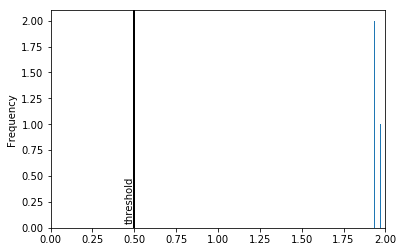

In [30]:
important_targets[target].plot.hist(xlim=[0,2])
plt.axvline(threshold, color='k', linewidth=2)
plt.text(threshold-0.055, plt.axis()[3]*0.2, 'threshold', rotation=90)